In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [17]:
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
data = pd.read_csv(url)

print(data.info())
print("\n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std  

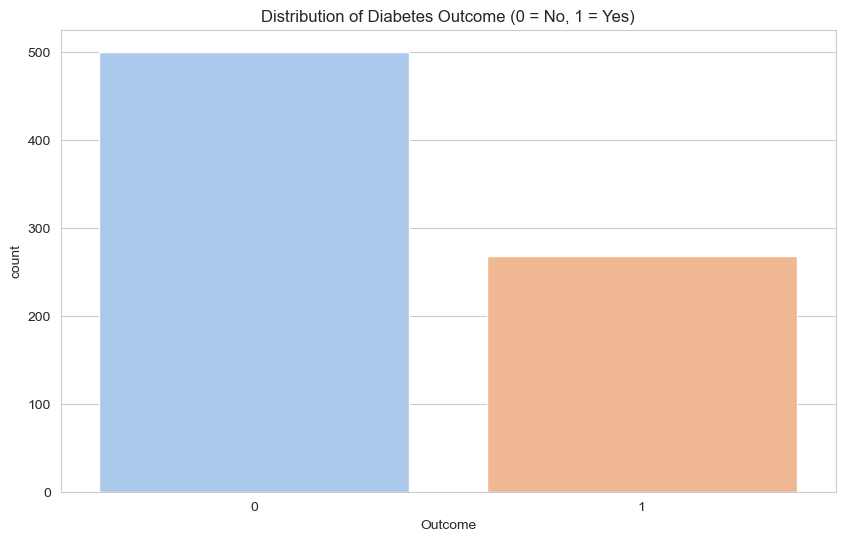

In [18]:
sns.countplot(x='Outcome', data=data, palette='pastel', hue='Outcome', legend=False)
plt.title('Distribution of Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()

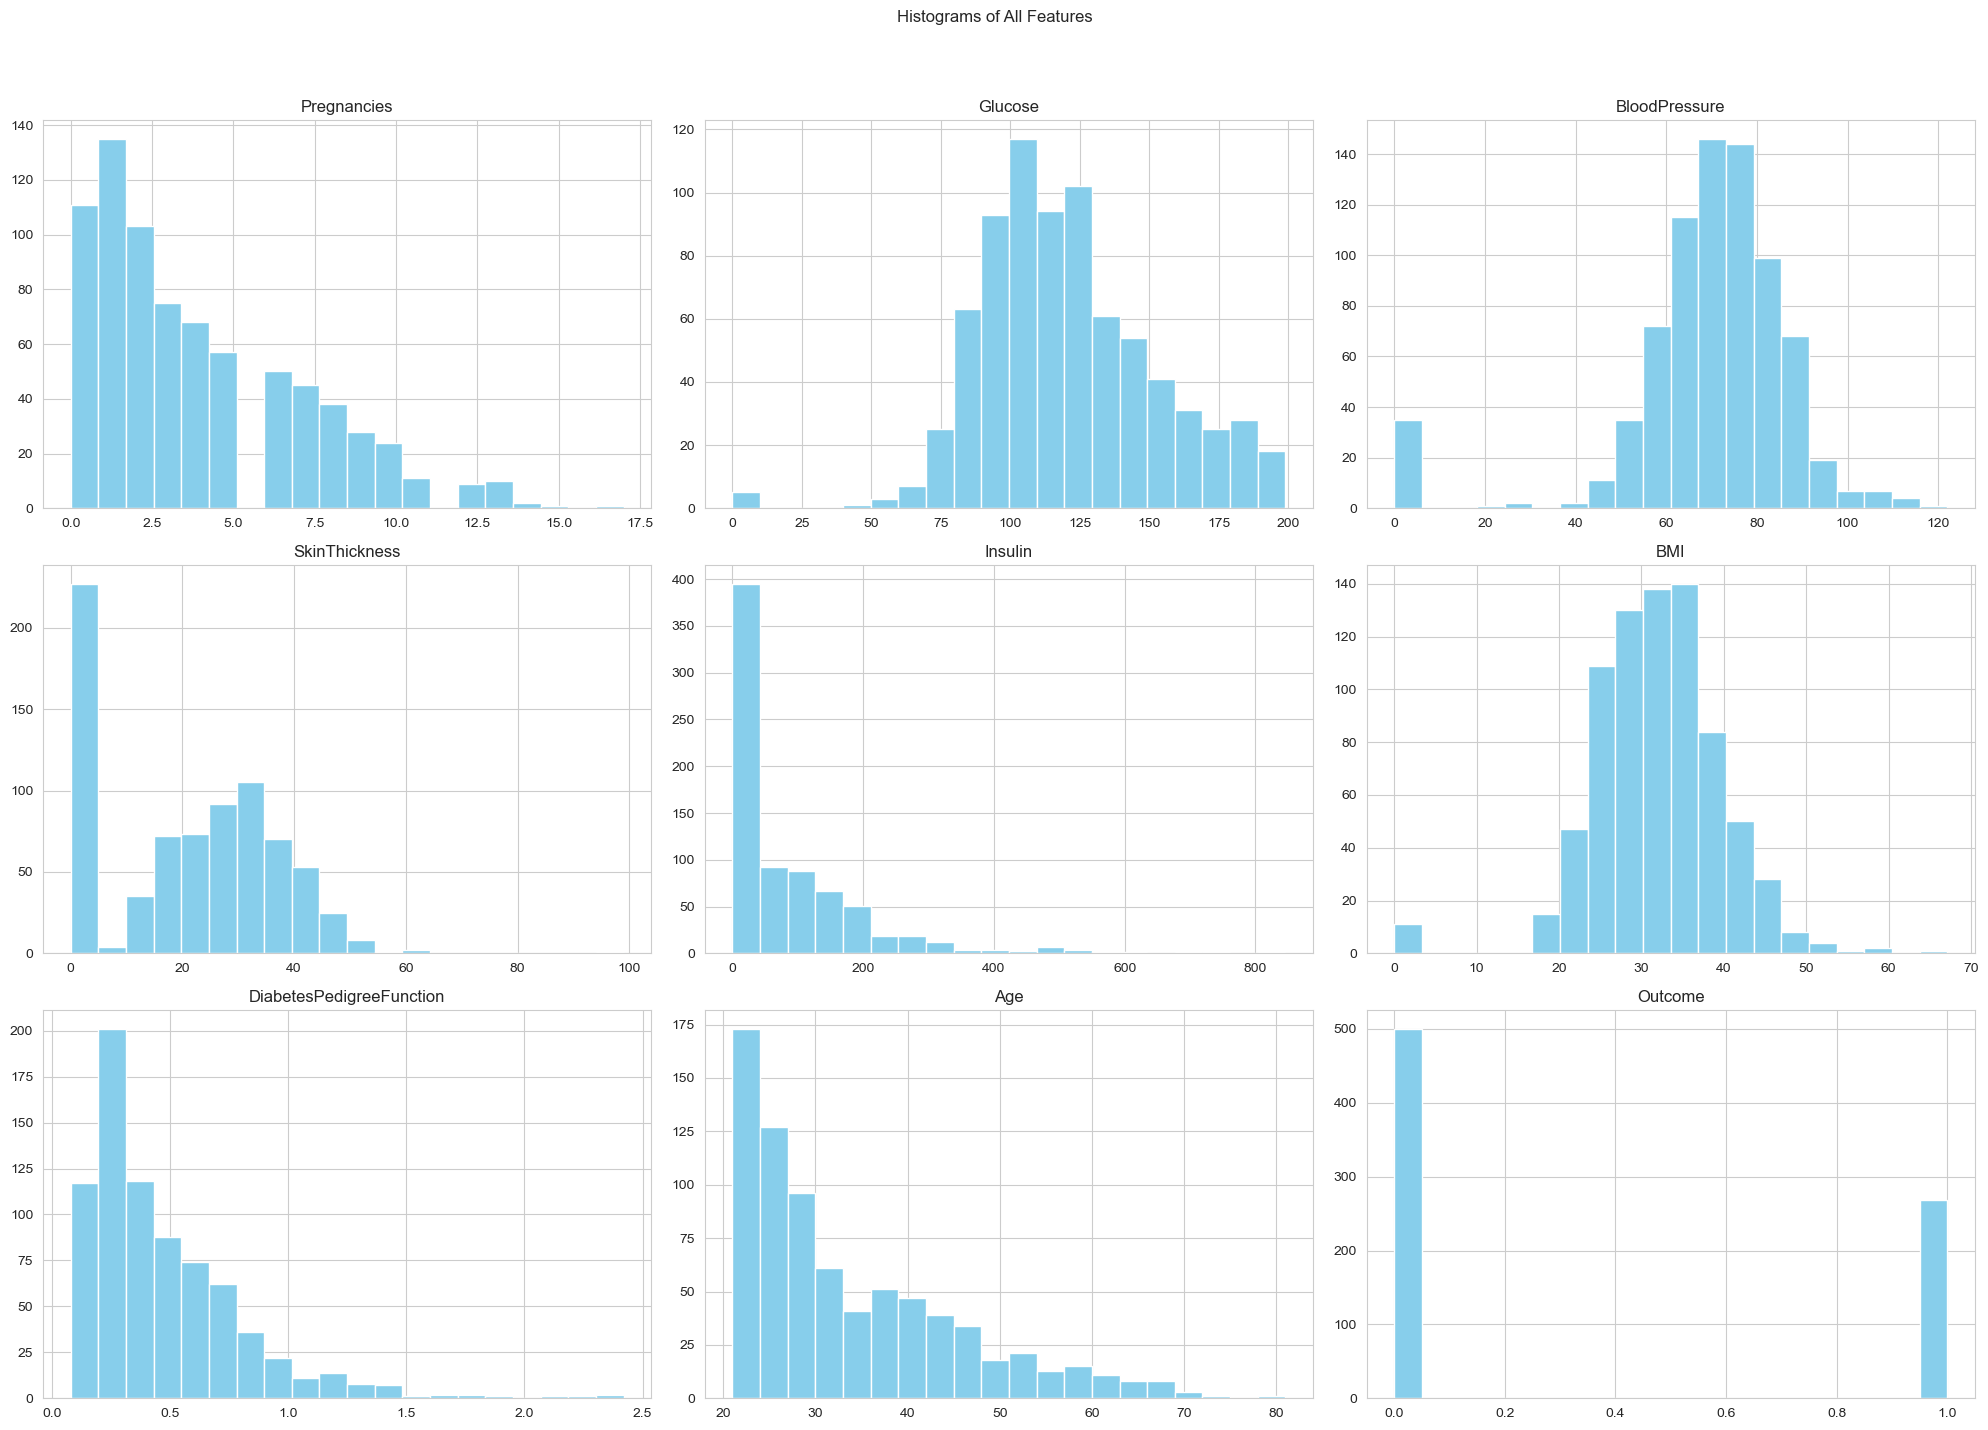

In [19]:
data.hist(bins=20, figsize=(20, 15), layout=(-1, 3), color='skyblue')
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

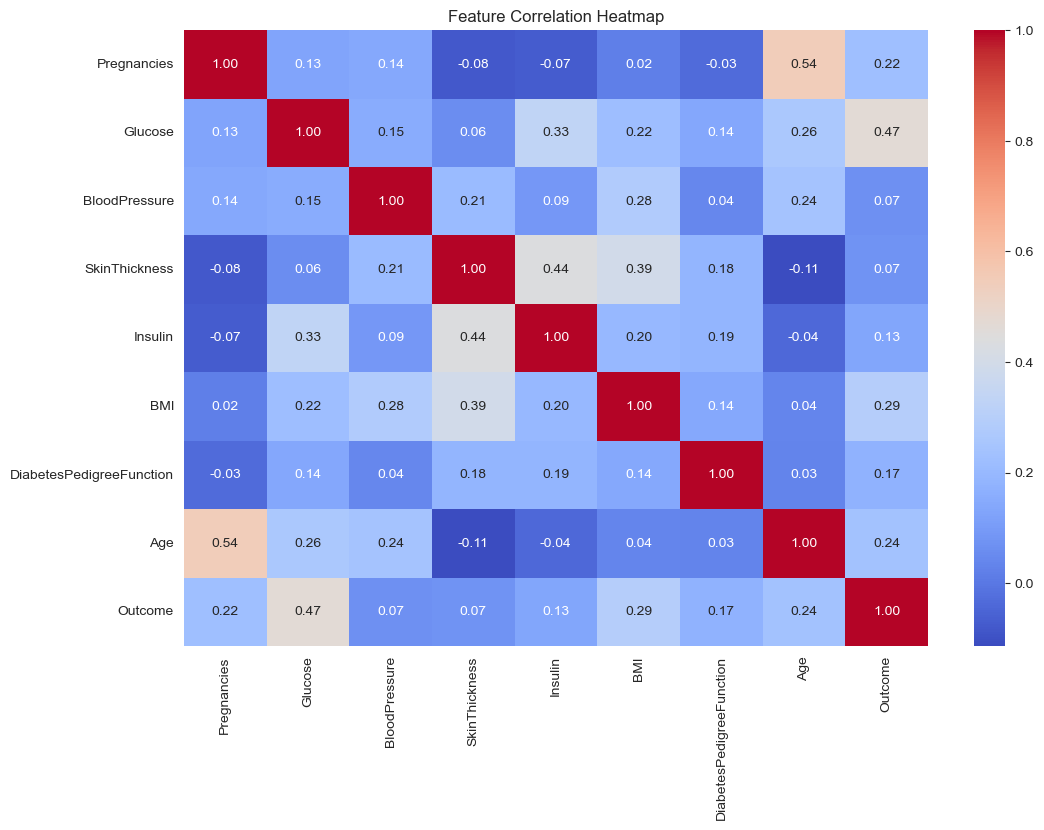

In [20]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

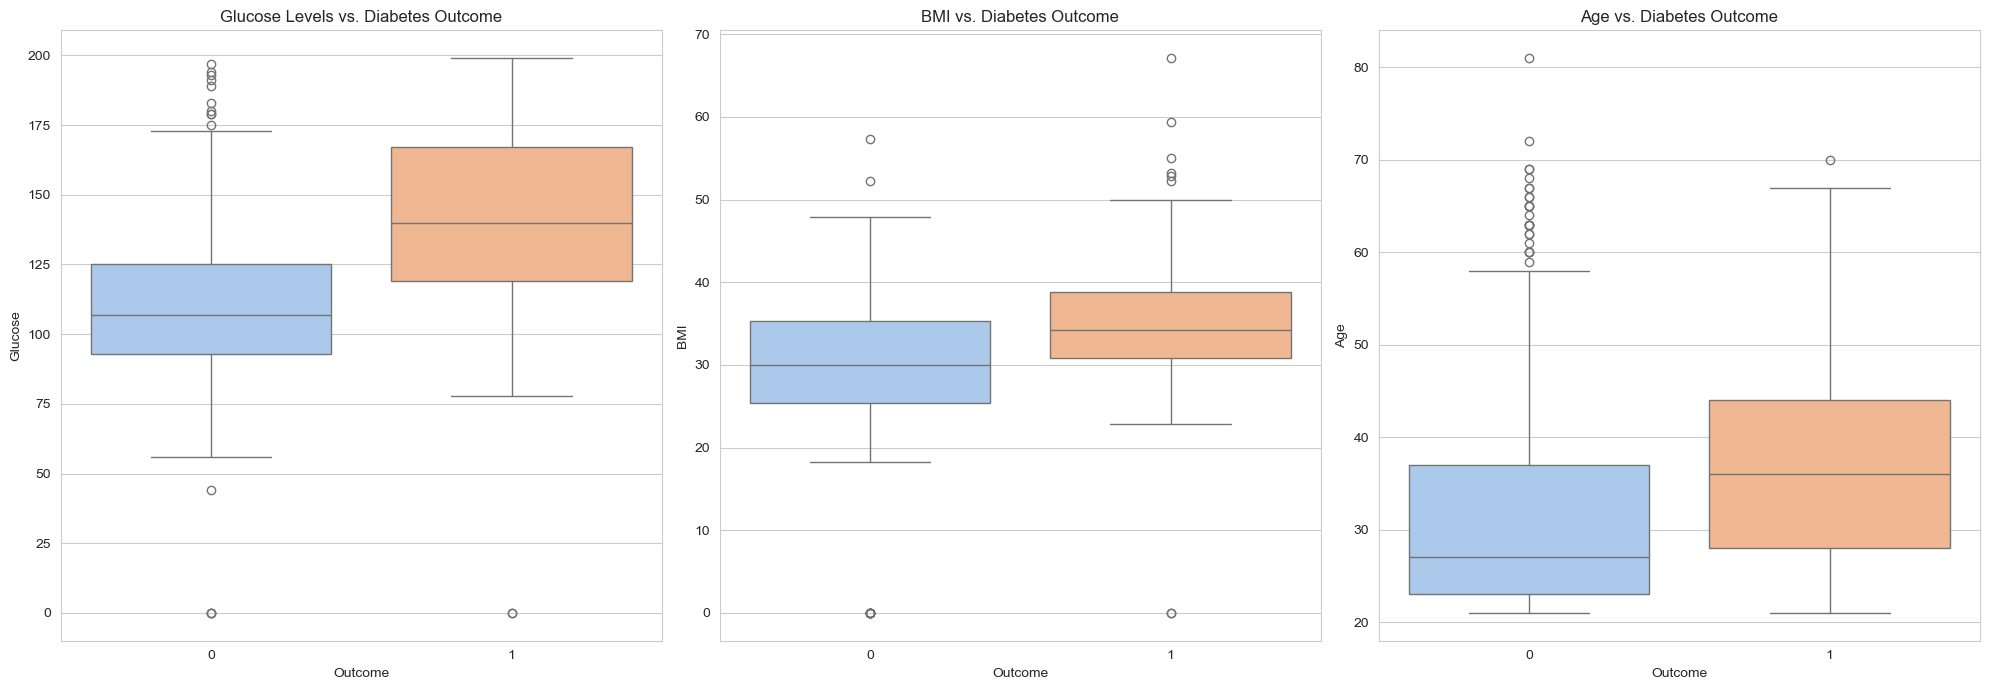

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Add hue='Outcome' and legend=False to each call
sns.boxplot(ax=axes[0], x='Outcome', y='Glucose', data=data, palette='pastel', hue='Outcome', legend=False)
axes[0].set_title('Glucose Levels vs. Diabetes Outcome')

sns.boxplot(ax=axes[1], x='Outcome', y='BMI', data=data, palette='pastel', hue='Outcome', legend=False)
axes[1].set_title('BMI vs. Diabetes Outcome')

sns.boxplot(ax=axes[2], x='Outcome', y='Age', data=data, palette='pastel', hue='Outcome', legend=False)
axes[2].set_title('Age vs. Diabetes Outcome')

plt.tight_layout()
plt.show()

In [22]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replace '0' with NaN
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)

# Fill NaN values with the median of each column
for col in columns_to_clean:
    data[col] = data[col].fillna(data[col].median())

# %%
# Check if the cleaning worked
print("--- Data after cleaning '0' values ---")
print(data.describe())

--- Data after cleaning '0' values ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.47695

In [23]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# %%
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %%
# Scale the Features
# This is very important for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %%
# Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# %%
# Evaluate the Model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Training Complete ---")
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

--- Model Training Complete ---
Model Accuracy on Test Set: 75.32%


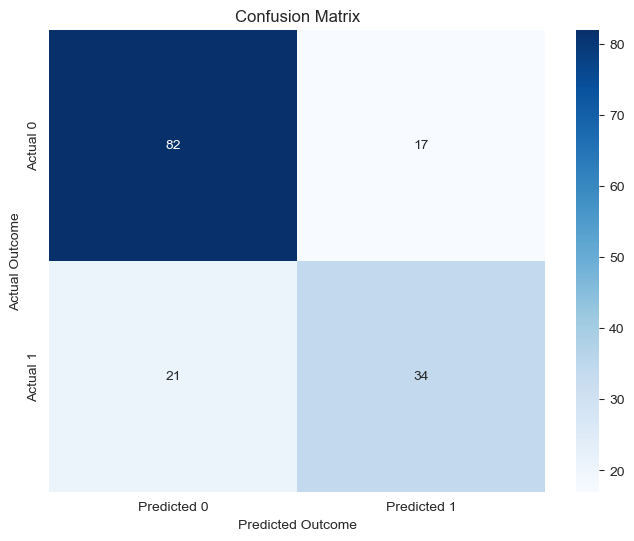

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.show()